In [27]:
#!pip install pandas 
#!pip install matplotlib
#!pip install numpy 
#!pip install scipy 
#!pip install copulas
#!pip install seaborn

In [28]:
import copulas.datasets
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import numpy as np 
import pandas as pd
from scipy.stats import gamma, norm
import seaborn as sns

## Данни за две едномерни разпределения и тяхната интерпертация с непрекъснати случайни величини

In [29]:
df = copulas.datasets.sample_bivariate_age_income(size=5000, seed=839)

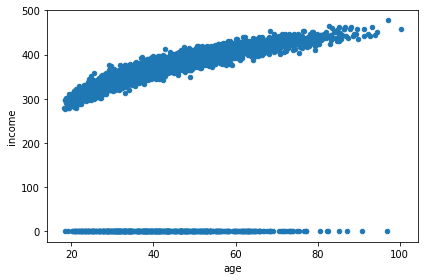

In [30]:
df.plot.scatter(x='age', y='income')
plt.tight_layout()
plt.show()

In [31]:
df = df[df['income'] > 10]
# df

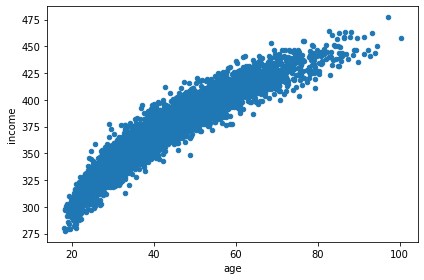

In [32]:
df.plot.scatter(x='age', y='income')
plt.tight_layout()
plt.show()

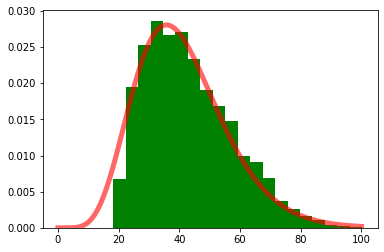

In [33]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 100, 100)
ax.plot(x, gamma.pdf(x, a=7.5, scale=5.5), 'r-', lw=5, alpha=0.6, label='gamma pdf')

# the histogram of the data
n, bins, patches = ax.hist(df['age'], 20, density=True, facecolor='g', alpha=1)

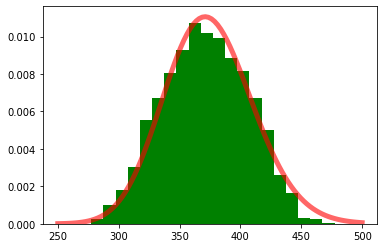

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(250, 500, 100)
ax.plot(x, gamma.pdf(x, a=107, scale=3.5), 'r-', lw=5, alpha=0.6, label='gamma pdf')

# the histogram of the data
n, bins, patches = ax.hist(df['income'], 20, density=True, facecolor='g', alpha=1)

## За две копули да се начертаят графиките, графиките на линиите на ниво и да се генерира случайна извадка с 500 точки и да се представи визулация

### Plackett 

In [35]:
# theta > 0
theta = 12

In [36]:
def c(u, v):
    if theta == 1:
        return u * v
    elif theta != 1:
        return ((1 + (theta - 1) * (u + v)) - ((1 + (theta - 1) * (u + v)) ** 2 - 4 * u * v * theta * (theta - 1)) ** 0.5) / (2 * (theta - 1))

In [37]:
def plot_surface(copula_function, name):
    u = np.linspace(0, 1, 10)
    v = np.linspace(0, 1, 10)
    U, V = np.meshgrid(u, v)
    Z = copula_function(U, V)

    ax = plt.axes(projection='3d')
    ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='black')
    ax.set_title(f'{name} copula')
    ax.view_init(20, -135)

    plt.tight_layout()
    plt.show()

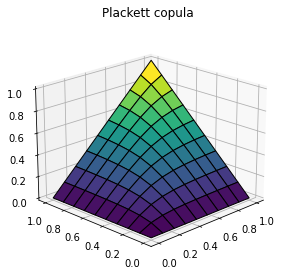

In [38]:
plot_surface(c, 'Plackett')

In [39]:
def plot_contour(copula_function, name):
    u = np.linspace(0, 1, 1000)
    v = np.linspace(0, 1, 1000)
    U, V = np.meshgrid(u, v)
    Z = copula_function(U, V)

    ax = plt.axes(projection='3d')
    ax.contour3D(U, V, Z, 40, cmap='viridis')
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('z')
    ax.set_title(f'{name} copula')
    ax.view_init(20, -80)

    plt.tight_layout()
    plt.show()

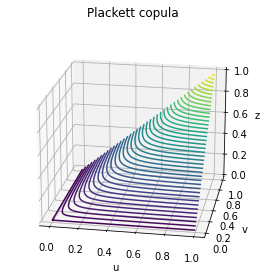

In [40]:
plot_contour(c, 'Plackett')

In [41]:
def plot_contour2d(copula_function, name):
    u = np.linspace(0, 1, 1000)
    v = np.linspace(0, 1, 1000)
    U, V = np.meshgrid(u, v)
    Z = copula_function(U, V)

    _, ax = plt.subplots(1, 1)
    ax.contourf(U, V, Z)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_title(f'{name} copula contour plot')
    ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

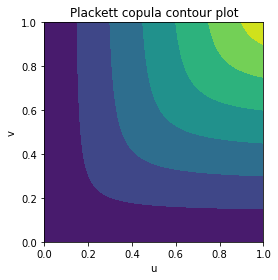

In [42]:
plot_contour2d(c, 'Plackett')

In [43]:
u = np.random.default_rng(13).uniform(0, 1, 5000)
t = np.random.default_rng(16).uniform(0, 1, 5000)

In [44]:
def plot_random_variable(random_variable_1, random_variable_2):
    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
    axis1, axis2, variables, names = [ax1, ax3], [ax2, ax4], [
        random_variable_1, random_variable_2], ['u', 't']

    for ax_1, ax_2, var, name in zip(axis1, axis2, variables, names):
        ax_1.plot(var, 'ob')
        ax_1.set_title(f'Random variable {name}', size=15)
        count, bins, ignored = ax_2.hist(var, 20, density=True)
        ax_2.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax_2.set_title(f'Histogram of the {name} samples and PDF', size=15)

    plt.tight_layout()
    plt.show()

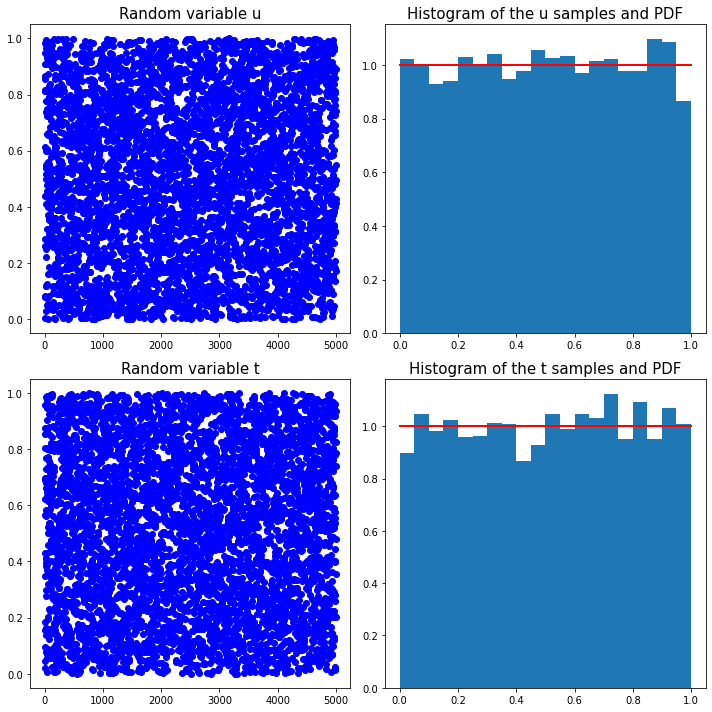

In [45]:
plot_random_variable(u, t)

In [46]:
def plot_plackett(thetas: list, u, t, copula_function):
    fig = plt.figure(figsize=(30, 20))
    axes_1 = [1, 2, 3]
    axes_2 = [4, 5, 6]

    for theta, ax_1, ax_2 in zip(thetas, axes_1, axes_2):
        a = t * (1 - t)
        b = theta + a * (theta - 1) ** 2
        c = 2 * a * (u * (theta ** 2) + 1 - u) + theta * (1 - 2 * a)
        d = (theta ** 0.5) * (theta + 4 * a * u * (1 - u) * (1 - theta) ** 2) ** 0.5
        v = (c - (1 - 2 * t) * d) / (2 * b)

        ax1 = fig.add_subplot(2, 3, ax_1)
        ax1.scatter(u, v)
        ax1.set_title(f'theta = {theta}', size=20)
        ax1.set_aspect('equal')

        ax2 = fig.add_subplot(2, 3, ax_2, projection='3d')
        ax2.scatter(u, v, copula_function(u, v))
        ax2.view_init(20, -135)

    plt.tight_layout()
    plt.show()

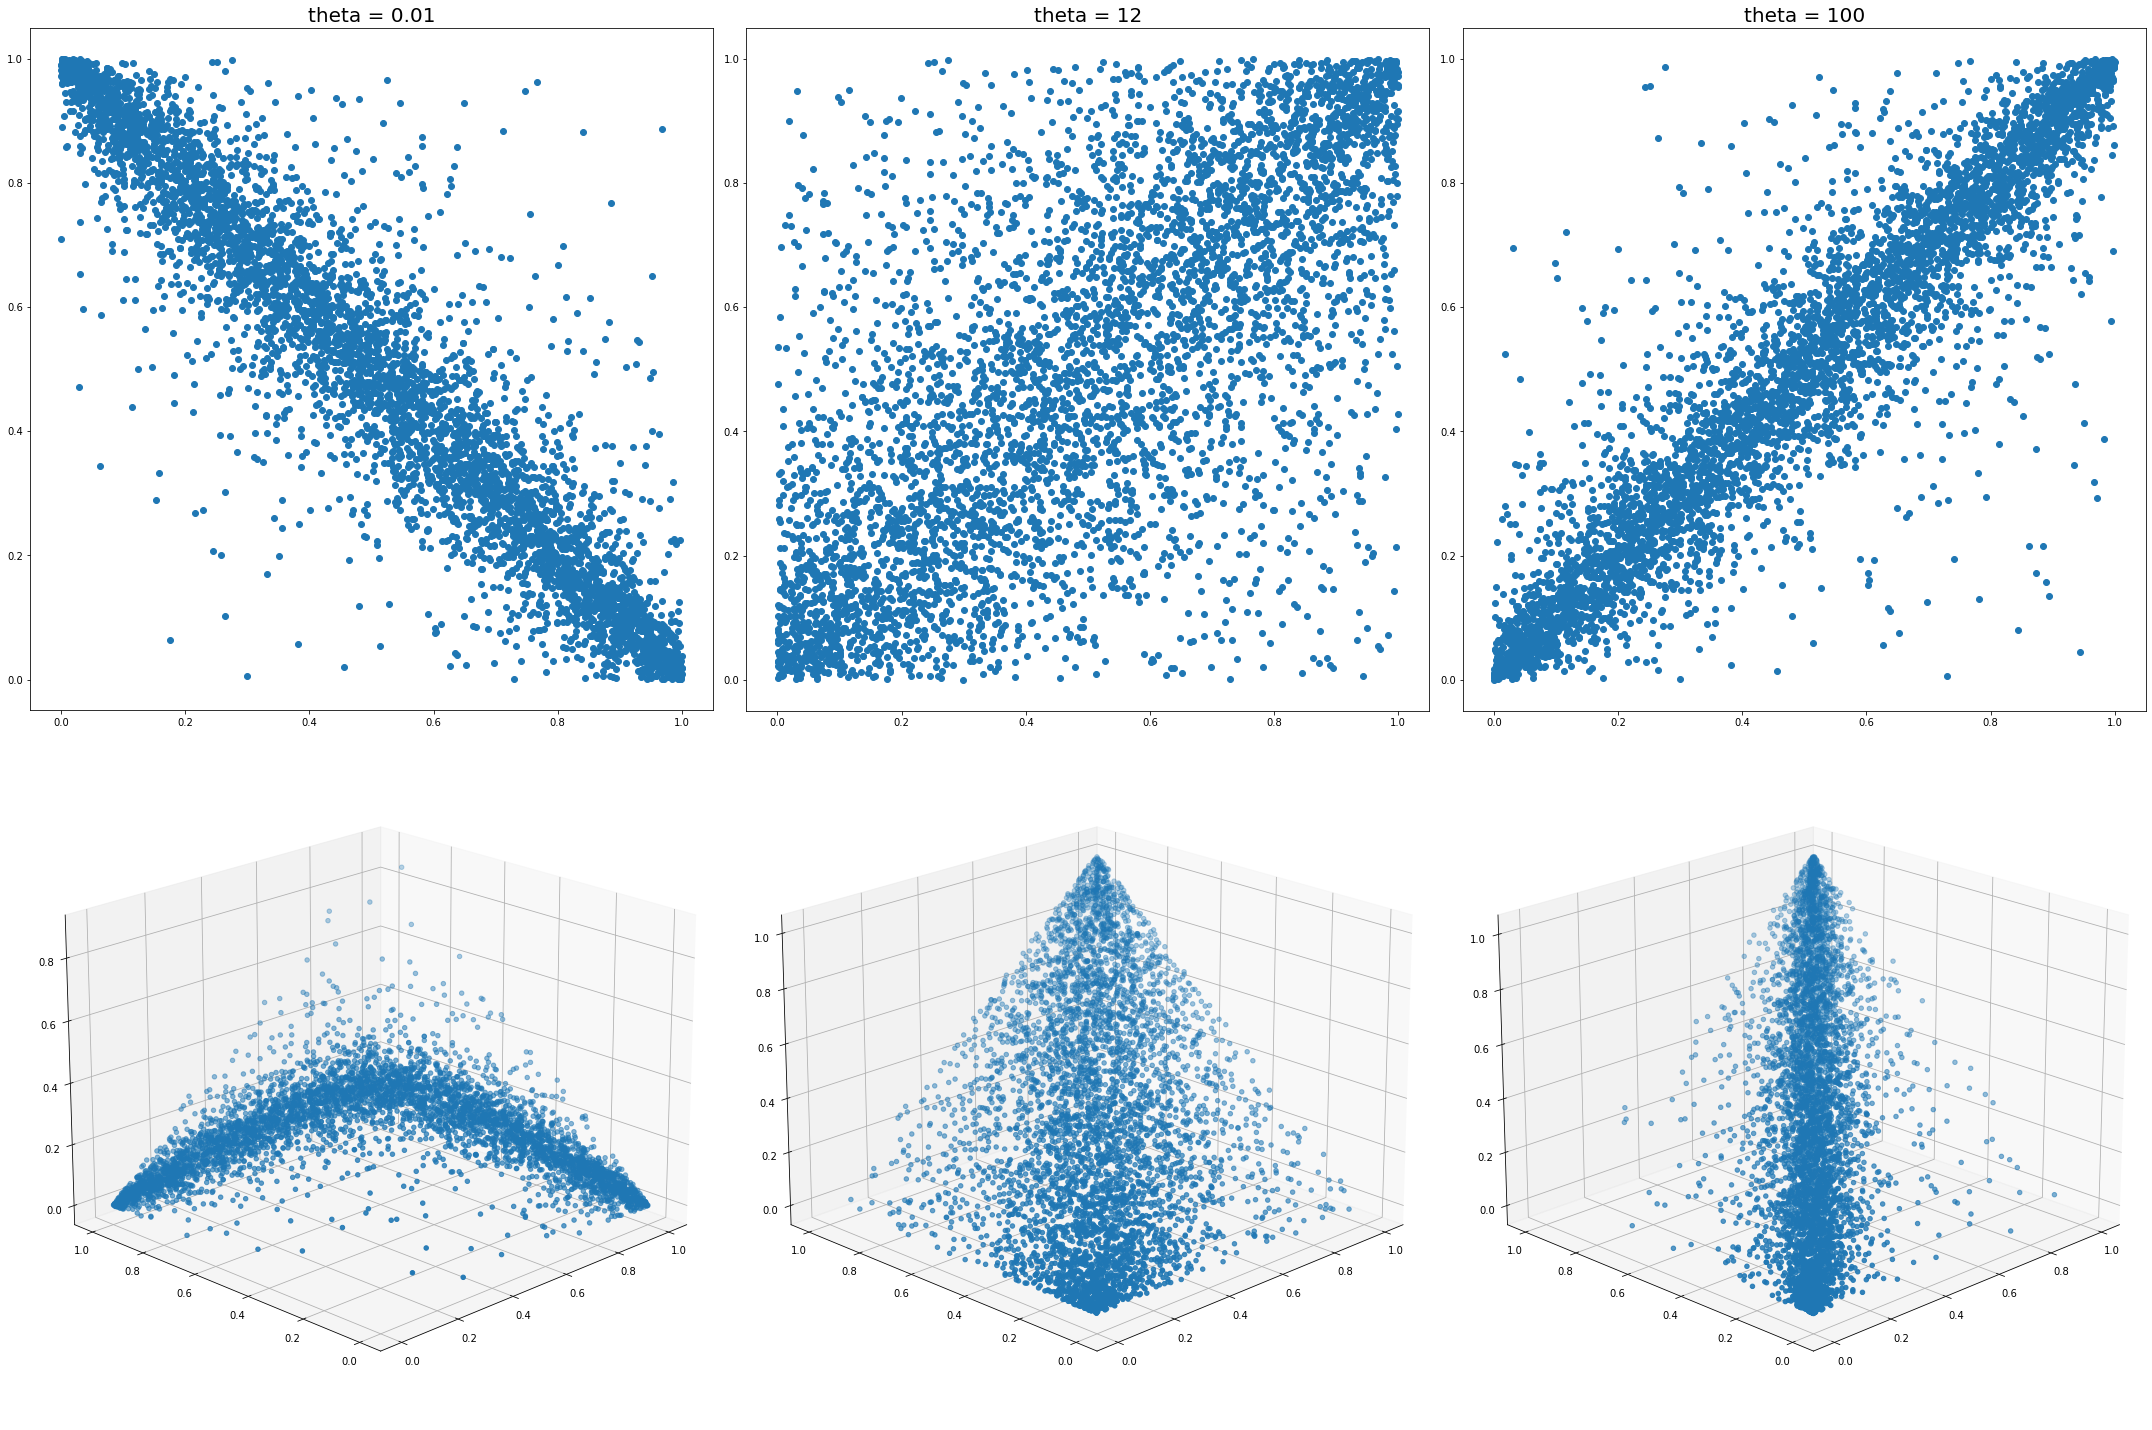

In [47]:
plot_plackett([0.01, 12, 100], u, t, c)

## Използвайки теоремата на Склар да се построи функцията на съвместно разпределение в двата случая, прилагайки двете копули и да се начертаят двете съвместни разпределения

Нека $H(x,y)$ е съвместното вероятностно разпределение на две случайни величини $X$ и $Y$ с маргинали $F(x)$ и $G(y)$. Тогава съществува копула $C(u,v)$, такава че $$H(x,y)=C(F(x),G(y)).$$ Ако $F$ и $G$ са непрекъснати функции, то копулата е единствена. Вярно е и обратното.

In [48]:
def c(u, v):
    if theta == 1:
        return u * v
    elif theta != 1:
        return ((1 + (theta - 1) * (u + v)) - ((1 + (theta - 1) * (u + v)) ** 2 - 4 * u * v * theta * (theta - 1)) ** 0.5) / (2 * (theta - 1))

In [49]:
g=lambda q: gamma.cdf(q, a=107, scale=3.5)

In [50]:
def h(x, y, f=lambda q: gamma.cdf(q, a=7.5, scale=5.5), g=lambda q: norm.cdf(q, loc=371, scale=39)):
    return c(f(x), g(y))

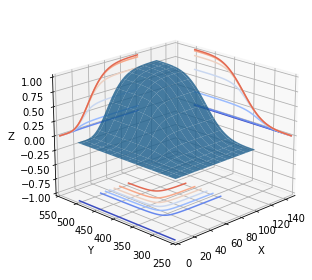

In [52]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, 100, 100)
y = np.linspace(250, 500, 100)
X, Y = np.meshgrid(x, y)
Z = h(X, Y)

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.8)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=150, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=550, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(0, 150)
ax.set_ylabel('Y')
ax.set_ylim(250, 550)
ax.set_zlabel('Z')
ax.set_zlim(-1, 1)
ax.view_init(20, -135)

plt.tight_layout()
plt.show()